In [1]:
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras import backend as K

np.random.seed(3)

Using TensorFlow backend.


In [2]:
labels_df = pd.read_csv('product_attributes_update.csv', encoding='utf-8', 
                    dialect='excel', lineterminator='\n')#updated?

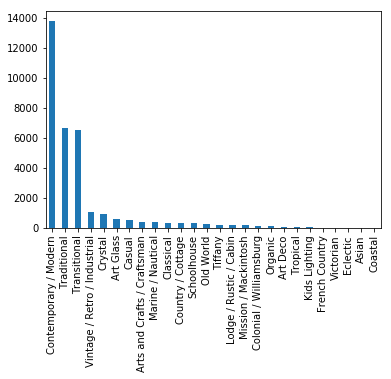

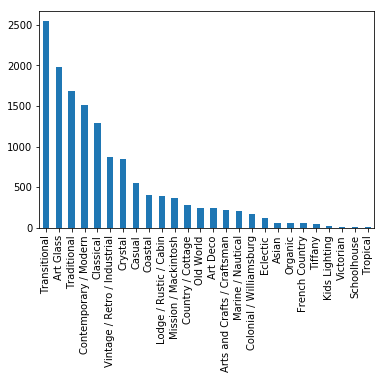

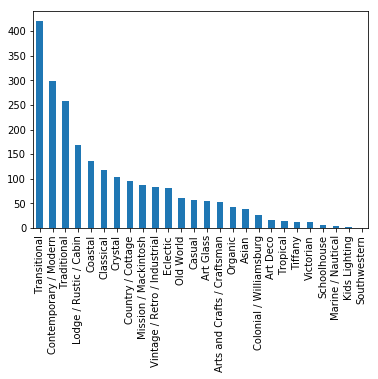

In [5]:
for ColumnName in ['Style1','Style2','Style3']:
    labels_df[ColumnName].value_counts().plot(kind="bar")
    plt.show()

In [ ]:
 def image2np_array( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data
 def df2features(df):
    return np.array([
        df['Style1'],
        df['Style2'],
        df['Style3'],
    ]).transpose()

x_train_list=[]
y_train_list=[]

one_hot1=pd.get_dummies(labels_df['Style1'])
one_hot2=pd.get_dummies(labels_df['Style2'])
one_hot3=pd.get_dummies(labels_df['Style3'])

for row in labels_df.itertuples():
    if pd.notnull(row[11]):
        try:
            img = image2np_array('E:\\ml_128x128\\'+row[1]+'.jpg').reshape(128,128,1)#нужны разноцветные картинки.
        except IOError:
            continue
        x_train_list.append(img)
        y_train_list.append(one_hot.loc[row[0],:].values)